<a href="https://colab.research.google.com/github/andiainundzariah/Skripsi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [11]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data)
print(len(pneumonia_data))

tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data)
print(len(tidakPneumonia_data))

['person63_bacteria_306.jpeg', 'person26_bacteria_122.jpeg', 'person69_bacteria_338.jpeg', 'person124_virus_238.jpeg', 'person60_bacteria_287.jpeg', 'person162_virus_319.jpeg', 'person74_bacteria_362.jpeg', 'person53_bacteria_254.jpeg', 'person55_bacteria_265.jpeg', 'person72_bacteria_353.jpeg', 'person51_bacteria_248.jpeg', 'person64_bacteria_316.jpeg', 'person253_bacteria_1156.jpeg', 'person97_virus_181.jpeg', 'person41_bacteria_206.jpeg', 'person255_bacteria_1188.jpeg', 'person24_bacteria_112.jpeg', 'person96_virus_179.jpeg', 'person256_bacteria_1189.jpeg', 'person125_virus_254.jpeg', 'person36_bacteria_183.jpeg', 'person38_bacteria_190.jpeg', 'person7_bacteria_25.jpeg', 'person66_bacteria_326.jpeg', 'person266_bacteria_1238.jpeg', 'person104_virus_191.jpeg', 'person41_bacteria_210.jpeg', 'person68_bacteria_335.jpeg', 'person88_virus_165.jpeg', 'person23_bacteria_102.jpeg', 'person39_bacteria_200.jpeg', 'person264_virus_547.jpeg', 'person124_virus_234.jpeg', 'person3_bacteria_12.jpe

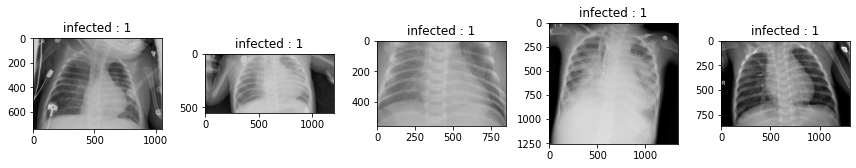

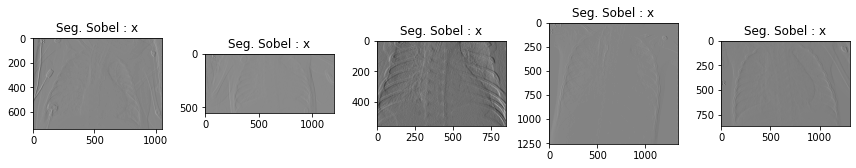

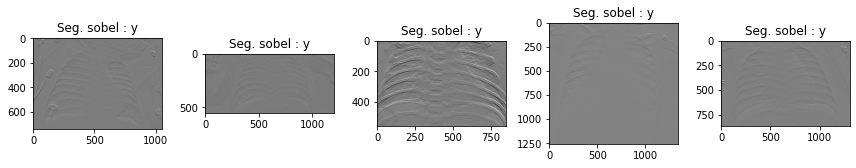

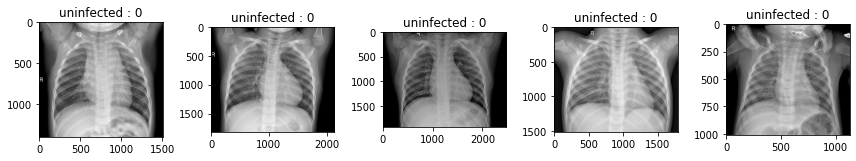

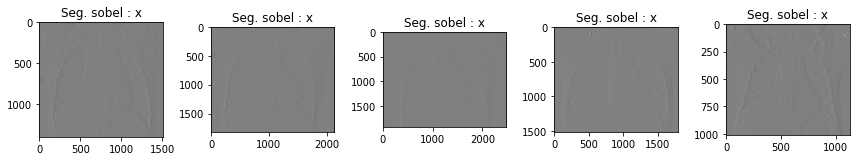

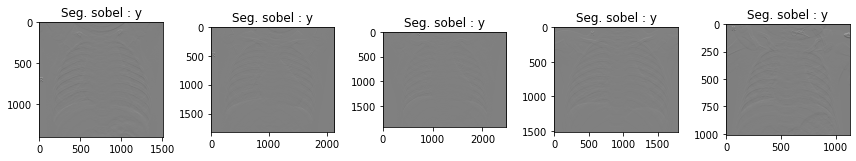

In [15]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi


plt.figure(figsize = (12,12)) #mengatur skala citra yg ditmpilkan
for i in range(5):            #melakukan perulangan sbnyk 5X (dgn nilai awal i=0)
    plt.subplot(1, 5, i+1)    #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img,cmap='gray')           #plot citra sesuai ketmpt yg disediakan baris ke2
    plt.title('infected : 1') #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()        #tampilannya disesuaikan dgn lebar layar

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()

plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur(gray, (3,3), 0)
  edges = cv2.Sobel (img, cv2.CV_64F,0,1, ksize=5)
  plt.imshow(edges, cmap="gray")
  plt.title ('Seg. sobel : y')
  plt.tight_layout()


#Tahap Visualisasi Citra Tidak Pneumonia

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,1,0,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_64F,0,1,ksize=5)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:
#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv", x, fmt='%s',delimiter=',' )

In [19]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DATA5050/DatasetPneumonia5050.csv')
print (len(dataset))
print (dataset)

1000
               H1            H2  ...            H7  Target
0   -1.474629e-01  1.833129e-01  ... -8.127503e-03     1.0
1    4.276852e-01  2.174452e-01  ...  3.051393e-03     1.0
2    4.035495e+04  1.628860e+09  ...  2.820530e+23     1.0
3    4.471811e+03  2.002567e+07  ...  5.256148e+17     1.0
4   -2.058378e+00  4.676753e+00  ... -1.491871e+01     1.0
..            ...           ...  ...           ...     ...
995  2.743434e+02  7.553336e+04  ...  1.759409e+10     0.0
996 -4.909941e+03  2.411012e+07  ...  3.994162e+15     0.0
997 -5.434392e+07  2.953265e+15  ... -8.053032e+36     0.0
998 -2.052202e+04  4.211816e+08  ...  6.107747e+20     0.0
999 -7.648932e+03  5.858507e+07  ... -1.875096e+18     0.0

[1000 rows x 8 columns]


In [20]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.2)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

800
200
800
200
1000


,H1,H2,H3,H4,H5,H6,H7
0,-1.474629e-01,1.833129e-01,3.165747e-01,8.719546e-02,1.199239e-02,-3.688877e-02,-8.127503e-03
1,4.276852e-01,2.174452e-01,4.059299e-01,3.420157e-01,1.274002e-01,1.592647e-01,3.051393e-03
2,4.035495e+04,1.628860e+09,2.629560e+14,2.629271e+14,6.913446e+28,1.061151e+19,2.820530e+23
3,4.471811e+03,2.002567e+07,3.584476e+11,3.580032e+11,1.282458e+23,1.602066e+15,5.256148e+17
4,-2.058378e+00,4.676753e+00,4.137810e+01,3.755659e+01,1.480445e+03,-8.121229e+01,-1.491871e+01
...,...,...,...,...,...,...,...
995,2.743434e+02,7.553336e+04,8.305345e+07,8.285305e+07,6.872924e+15,2.277078e+10,1.759409e+10
996,-4.909941e+03,2.411012e+07,4.735289e+11,4.735833e+11,2.242683e+23,-2.325391e+15,3.994162e+15
997,-5.434392e+07,2.953265e+15,6.419685e+23,6.419678e+23,4.121229e+47,-3.488707e+31,-8.053032e+36
998,-2.052202e+04,4.211816e+08,3.457489e+13,3.457527e+13,1.195443e+27,-7.095783e+17,6.107747e+20


1.0    402
0.0    398
Name: Target, dtype: int64
0.0    102
1.0     98
Name: Target, dtype: int64


Text(0.5, 1.0, 'TESTING')

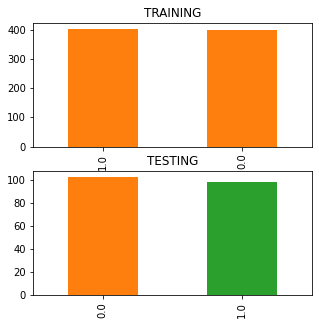

In [25]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,5)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [26]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       ...,
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746],
       [ 0.03550745, -0.03537814, -0.03537746, ..., -0.03537746,
         0.03537746, -0.03537746]])

In [27]:
math.sqrt(len(y_test))

14.142135623730951

In [29]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [30]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.])

In [31]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[73 29]
 [52 46]]
Akurasi : 0.595
presisi : 0.6133333333333333
recall : [0.71568627 0.46938776]
F-Measure : [0.64317181 0.53179191]


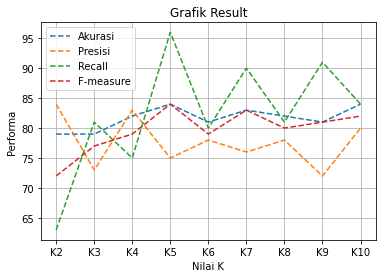

In [0]:
from matplotlib import pyplot as plt
x = ["K2", "K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 79, 82, 84, 81, 83, 82, 81, 84]
p = [84, 73, 83, 75, 78, 76, 78, 72, 80]
r = [63, 81, 75, 96, 80, 90, 81, 91, 84]
f = [72, 77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()